In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
test=pd.read_csv('/Users/asap/Desktop/ds/ineuron_course/16._ML_3/ensemble_boosting/adult.test', skiprows=1, header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
train=pd.read_csv('/Users/asap/Desktop/ds/ineuron_course/16._ML_3/ensemble_boosting/adult.data', skiprows=1, header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [10]:
train.columns = col_labels
test.columns = col_labels

In [12]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

<AxesSubplot:>

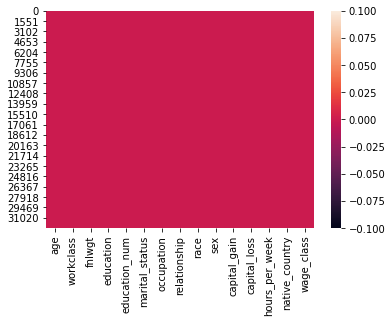

In [13]:
sns.heatmap(train.isnull())

<AxesSubplot:>

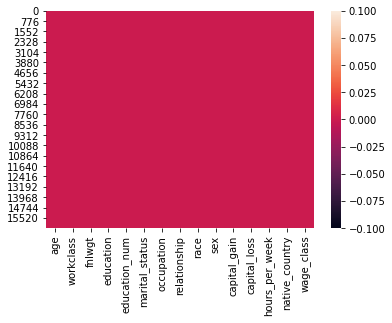

In [14]:
sns.heatmap(test.isnull())

In [42]:
train.head(30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [16]:
train['wage_class'].value_counts()

 <=50K    24719
 >50K      7841
Name: wage_class, dtype: int64

In [19]:
train['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [47]:
train_workclass=pd.get_dummies(train['workclass'], prefix='workclass', drop_first=True)

In [48]:
train_workclass

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
32555,0,0,0,1,0,0,0,0
32556,0,0,0,1,0,0,0,0
32557,0,0,0,1,0,0,0,0
32558,0,0,0,1,0,0,0,0


In [20]:
train['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [54]:
train_education=pd.get_dummies(train['education'], prefix='education', drop_first=True)

In [55]:
train_education

,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32556,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32557,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32558,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [22]:
train['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [56]:
train_marital_status=pd.get_dummies(train['marital_status'], prefix='marital_status', drop_first=True)

In [57]:
train_marital_status

,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed
0,0,1,0,0,0,0
1,0,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
32555,0,1,0,0,0,0
32556,0,1,0,0,0,0
32557,0,0,0,0,0,1
32558,0,0,0,1,0,0


In [23]:
train['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [58]:
train_occupation=pd.get_dummies(train['occupation'], prefix='occupation', drop_first=True)

In [59]:
train_occupation

,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,0,0,0,0,0,0,1,0
32556,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32557,1,0,0,0,0,0,0,0,0,0,0,0,0,0
32558,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
train['relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [60]:
train_relationship=pd.get_dummies(train['relationship'], prefix='relationship', drop_first=True)

In [61]:
train_relationship

,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
32555,0,0,0,0,1
32556,0,0,0,0,0
32557,0,0,0,1,0
32558,0,0,1,0,0


In [25]:
train['race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [62]:
train_race=pd.get_dummies(train['race'], prefix='race', drop_first=True)

In [63]:
train_race

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,1
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
32555,0,0,0,1
32556,0,0,0,1
32557,0,0,0,1
32558,0,0,0,1


In [26]:
train['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

In [64]:
train_sex=pd.get_dummies(train['sex'], prefix='sex', drop_first=True)

In [65]:
train_sex

,sex_ Male
0,1
1,1
2,1
3,0
4,0
...,...
32555,0
32556,1
32557,0
32558,1


In [27]:
train['native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [66]:
train_native_country=pd.get_dummies(train['native_country'], prefix='native_country', drop_first=True)

In [67]:
train_native_country

,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:
train_1=pd.concat([train, train_workclass, train_education, train_marital_status, train_occupation, train_relationship, train_race, train_sex, train_native_country], axis=1)

In [74]:
train_1=train_1.drop(['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'], axis=1)

In [75]:
train_1

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,154374,9,0,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,151910,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,201490,9,0,0,20,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [76]:
X=train_1.drop(['wage_class'], axis=1)
y=train_1['wage_class']

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [78]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scaled_data,y,test_size=0.25,random_state=42)

In [80]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train_x, train_y)

XGBClassifier()

In [81]:
from sklearn.metrics import accuracy_score

In [83]:
y_pred = model.predict(train_x)
accuracy = accuracy_score(train_y,y_pred)
accuracy

0.8676085176085176

In [84]:
y_pred = model.predict(test_x)
accuracy = accuracy_score(test_y,y_pred)
accuracy

0.8652334152334152

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [87]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [89]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.844, total=   1.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.849, total=   1.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.845, total=   1.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.845, total=   1.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.846, total=   1.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.853, total=   4.4s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.861, total=   4.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.856, total=   4.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.854, total=   4.3s
[CV]  l

[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.876, total=  43.0s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.870, total=  43.0s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.872, total=  42.8s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.873, total=  43.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.849, total=   3.8s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.859, total=   3.8s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.857, total=   3

[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.870, total=  16.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.874, total=  15.8s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.871, total=  14.3s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.867, total=  16.4s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.871, total=  18.4s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=0.871, total=  27.9s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=0.877, 

[CV]   learning_rate=0.1, max_depth=3, n_estimators=10, score=0.845, total=   1.0s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=10, score=0.846, total=   1.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.853, total=   4.6s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.861, total=   4.6s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.856, total=   4.7s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.854, total=   4.6s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.857, total= 

[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.876, total=  44.0s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.870, total=  43.8s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.872, total=  44.2s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.873, total=  43.7s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=10, score=0.849, total=   4.0s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=10, score=0.859, total=   3.8s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=10, score=0.8

[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.866, total=   6.4s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.870, total=  12.4s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.874, total=  12.5s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.871, total=  12.5s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.867, total=  12.4s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.871, total=  12.4s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0

[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.845, total=   1.0s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.845, total=   1.0s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.846, total=   1.0s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.853, total=   4.3s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.861, total=   4.3s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.856, total=   4.3s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=

[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.862, total=  44.7s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.876, total=  44.2s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.870, total=  44.9s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.872, total=  47.1s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.873, total=  46.8s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=20, n_estimators=10, score=0.849, total=   3.9s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=20, n_estimator

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 127.1min finished


GridSearchCV(estimator=XGBClassifier(),
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [90]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 5, 'n_estimators': 200}

In [91]:
new_model=XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 200)
new_model.fit(train_x, train_y)

XGBClassifier(learning_rate=1, max_depth=5, n_estimators=200)

In [92]:
y_pred_new = new_model.predict(test_x)
accuracy_new = accuracy_score(test_y,y_pred_new)
accuracy_new

0.850982800982801